## «Задачи классификации и кластеризации»

Задание.

- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
- Визуализируйте предсказания для тестовой выборки и центры классов
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# загрузка данных с цветками iris
iris = load_iris()

# перевод данных в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)', 'sepal width (cm)']]
data_class = iris.target

# добавление столбца с целевой переменной
data['variety'] = pd.DataFrame(data_class)[0]
data.head()

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [3]:
# разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.3)

In [4]:
# построение модели LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
print('Прогноз класса цветков (из тестовой выборки): \n', lda.predict(X_test))

Прогноз класса цветков (из тестовой выборки): 
 [2 0 0 0 0 1 0 1 2 0 0 2 1 2 1 2 1 2 0 1 2 0 0 1 2 0 2 1 1 0 1 1 2 1 1 0 2
 2 2 1 2 2 1 0 0]


In [5]:
# сравнение прогнозов с фактом
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,1,1
8,2,2
9,0,0


In [6]:
# оценка точности модели

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8666666666666667

In [7]:
# центроиды классов
lda.means_

array([[5.025     , 3.45833333, 0.        ],
       [5.9969697 , 2.73636364, 1.        ],
       [6.55833333, 2.96111111, 2.        ]])

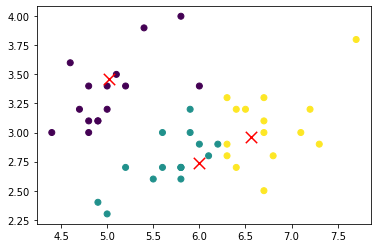

In [8]:
# визуализация предсказаний для тестовой выборки и центры классов
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
# отображение центроидов
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=130, marker='x')

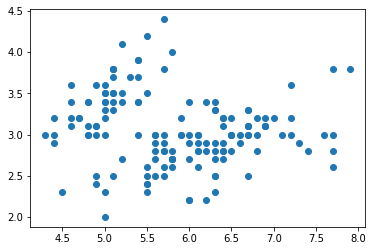

In [9]:
# исключение целевой переменной с оставлениием двух признаков - sepal_length и sepal_width
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
# визуализация начальных данных
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='autumn')

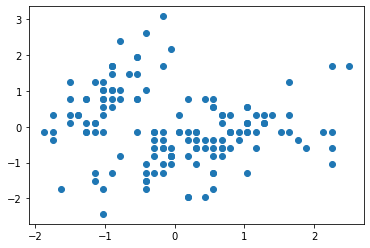

In [10]:
# приведение значений признаков к единому масштабу и визуализация

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn')

In [11]:
# подбор оптимального числа кластеров для алгоритма kmeans
from sklearn.cluster import KMeans

# строим график локтя
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

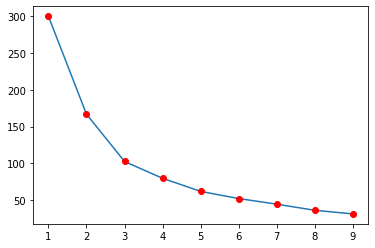

In [12]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia , 'ro')

In [13]:
# принимаем количество кластеров равным 3
kmeans = KMeans(n_clusters=3)

# обучение
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

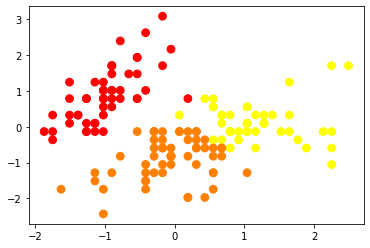

In [14]:
# визуализация кластеров
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [ ]:
# вероятно, подобранное количество кластеров неоптимально (визуально, оранжевый и красный кластеры можно было бы объединить)

**Вывод:**

Результат классификации может очень сильно отличаться в зависимости от случайного разбиения данных на train и test. Такое может происходить, особенно когда данных не очень много.
С учетом указанного, в целях объективного сравнения разных моделей между собой, необходимо применение механизмов кросс-валидации (то есть при обучении модели данные разбиваются множеством разных способов и считается условно “усредненный” лучший результат в цикле).